UTILIZACION DE LA TIENDA VIRTUAL DE COLOMBIA EN EL TERRITORIO NACIONAL

Proyecto: Bootcamp Análisis y Visualización de Datos  AVDV1-243 Estudiante : Milena Vergara Rusinque agosto 2024

OBJETIVO: Con base en los datos publicados en la pagina web Datos Abiertos del estado Colombiano, se analizó la información relacionada con la utilización de la Tienda Virtual del Estado Colombiano, durante el periodo 2013 a 2024 en todo el territorio nacional.

ALCANCE: Dada la magnitud de la base de datos con 131K en filas y 21 columnas, fue necesario excluir del análisis varias columnas, de tal forma que se lograra un análisis con la mayoria de los datos y que aportaban valor, finalmente las columnas utilizadas de las ordenes de compra fueron cinco (5): año, entidad, total,agregación y ciudad. Y respecto a las filas, tambien fue necesario excluir algunas, cuyos registros podian afectar el análisis, entre ellas: las de ordenes de compra canceladas, cerradas, cerradas por error, con valor cero (0) o que no reportaron la ciudad de origen, para un total de 87,9K; estas exclusiones permitieron caragr la informacion en las diferentes palataformas de analisis, considerando que el peso del archivo superaba los 34MB.

Fuente de datos: https://www.datos.gov.co/Gastos-Gubernamentales/Tienda-Virtual-del-Estado-Colombiano-Consolidado/rgxm-mmea/about_data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tiendavirtual_df = pd.read_csv("data/Tienda_Virtual_del_Estado_Colombiano_-_Consolidado_DEPUR_20240806H.csv",sep=';')

In [4]:
tiendavirtual_df

,año,Entidad,valor miles $,Agregación,CIUDAD
0,2014,MINISTERIO DE VIVIENDA CIUDAD Y TERRITORIO,91209,COMBUSTIBLE (BOGOTA),BOGOTA
1,2022,BOGOTA COLEGIO LA FELICIDAD IED,15305,GRANDES SUPERFICIES,BOGOTA
2,2022,PARQUES NACIONALES NATURALES DIRECCION TERRITO...,4975,GRANDES SUPERFICIES,CALI
3,2022,CONTRALORIA DE CUNDINAMARCA,11654,ETP III,BOGOTA
4,2022,ARCBOLIVAR,6580,GRANDES SUPERFICIES,CARTAGENA
...,...,...,...,...,...
87898,2022,INSTITUTO NACIONAL DE MEDICINA LEGAL Y CIENCIA...,1064,GRANDES SUPERFICIES,MEDELLIN
87899,2022,DIRECCION SECCIONAL DE IMPUESTOS Y ADUANAS DE ...,218477,ASEO Y CAFETERIA III,NEIVA
87900,2022,INPEC ESTABLECIMIENTO PENITENCIARIO Y CARCELA...,2594,GRANDES SUPERFICIES,SEVILLA
87901,2022,PARQUES NACIONALES NATURALES DE COLOMBIA,462719,IAD SOFTWARE I GOOGLE,BOGOTA


In [7]:
type(tiendavirtual_df)

pandas.core.frame.DataFrame

In [8]:
tiendavirtual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87903 entries, 0 to 87902
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   año            87903 non-null  int64 
 1   Entidad        87903 non-null  object
 2   valor miles $  87903 non-null  int64 
 3   Agregación     87606 non-null  object
 4   CIUDAD         87903 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.4+ MB


In [9]:
tiendavirtual_df.dtypes

año               int64
Entidad          object
valor miles $     int64
Agregación       object
CIUDAD           object
dtype: object

In [10]:
tiendavirtual_df.columns

Index(['año', 'Entidad', 'valor miles $', 'Agregación', 'CIUDAD'], dtype='object')

In [11]:
tiendavirtual_df.head()

,año,Entidad,valor miles $,Agregación,CIUDAD
0,2014,MINISTERIO DE VIVIENDA CIUDAD Y TERRITORIO,91209,COMBUSTIBLE (BOGOTA),BOGOTA
1,2022,BOGOTA COLEGIO LA FELICIDAD IED,15305,GRANDES SUPERFICIES,BOGOTA
2,2022,PARQUES NACIONALES NATURALES DIRECCION TERRITO...,4975,GRANDES SUPERFICIES,CALI
3,2022,CONTRALORIA DE CUNDINAMARCA,11654,ETP III,BOGOTA
4,2022,ARCBOLIVAR,6580,GRANDES SUPERFICIES,CARTAGENA


In [12]:
tiendavirtual_df.tail()

,año,Entidad,valor miles $,Agregación,CIUDAD
87898,2022,INSTITUTO NACIONAL DE MEDICINA LEGAL Y CIENCIA...,1064,GRANDES SUPERFICIES,MEDELLIN
87899,2022,DIRECCION SECCIONAL DE IMPUESTOS Y ADUANAS DE ...,218477,ASEO Y CAFETERIA III,NEIVA
87900,2022,INPEC ESTABLECIMIENTO PENITENCIARIO Y CARCELA...,2594,GRANDES SUPERFICIES,SEVILLA
87901,2022,PARQUES NACIONALES NATURALES DE COLOMBIA,462719,IAD SOFTWARE I GOOGLE,BOGOTA
87902,2022,UNIDAD PRESTADORA DE SALUD ANTIOQUIA,365821,SERVICIOS BPO II,ENVIGADO


In [13]:
pd.unique(tiendavirtual_df['Agregación'])

array(['COMBUSTIBLE (BOGOTA)', 'GRANDES SUPERFICIES', 'ETP III',
       'MESA DE SERVICIO II', 'COMBUSTIBLE (NACIONAL)',
       'CENTRO DE CONTACTO', 'MATERIALES DE CONSTRUCCION Y FERRETERIA',
       'IAD SOFTWARE I  MICROSOFT', 'CONECTIVIDAD III',
       'IAD SOFTWARE I  GOOGLE', 'ATENCION A EMERGENCIAS',
       'DOTACIONES DE VESTUARIO III', 'ASEO Y CAFETERIA', 'SOAT II',
       'MOTOCICLETAS CUATRIMOTOS Y MOTOCARROS II', 'SOFTWARE_EMPRESARIAL',
       'IAD SOFTWARE I  FABRICANTES', 'NUBE PUBLICA IV', 'ARCGIS',
       'MATERIAL DE INTENDENCIA II', 'ASEO Y CAFETERIA III',
       'DOTACION ESCOLAR II', 'PAPELERIA Y UTILES DE OFICINA',
       'COMBUSTIBLE (BOGOTA) II', 'PRIMERA INFANCIA',
       'DOTACIONES DE VESTUARIO', 'COMBUSTIBLE (NACIONAL) II',
       'MATERIAL PEDAGOGICO', 'CONSUMIBLES DE IMPRESION II', 'SOAT III',
       'IAD SOFTWARE',
       'MEDICAMENTOS DE CONTROL ESPECIAL DE MONOPOLIO DEL ESTADO',
       'VEHICULOS III', 'MATERIAL DE INTENDENCIA',
       'MANTENIMIENTO Y AU

In [14]:
pd.unique(tiendavirtual_df['año'])

array([2014, 2022, 2016, 2023, 2013, 2024, 2015, 2019, 2017, 2018, 2020,
       2021])

In [14]:
pd.unique(tiendavirtual_df['Entidad'])

array(['MINISTERIO DE VIVIENDA CIUDAD Y TERRITORIO',
       'BOGOTA  COLEGIO LA FELICIDAD IED',
       'PARQUES NACIONALES NATURALES DIRECCION TERRITORIAL PACIFICO FONAM',
       ..., 'CALDAS  PERSONERIA MUNICIPAL DE CHINCHINA',
       'VALLE DEL CAUCA  INSTITUCION EDUCATIVA DE SANTA LIBRADA  CALI',
       'QUINDIO  ESE HOSPITAL SAGRADO CORAZON DE JESUS DE QUIMBAYA'],
      dtype=object)

In [15]:
pd.unique(tiendavirtual_df['CIUDAD'])

array(['BOGOTA', 'CALI', 'CARTAGENA', 'BUCARAMANGA', 'NEIVA', 'ACACIAS',
       ' BARRANCABERMEJA', 'MEDELLIN', 'SOCORRO', 'IBAGUE',
       'PIJAO QUINDIO', 'POPAYAN', 'MANIZALES', 'MALAMBO', 'DOSQUEBRADAS',
       'LA CALERA', 'TULUA', 'GACHALA',
       'VILLAVICENCIO META Y YOPAL CASANARE', 'VELEZ', 'ANTIOQUIA',
       'FLORIDABLANCA', 'NILO', 'BUENAVENTURA', 'GIRARDOT', 'CARTAGO',
       'ARMENIA', 'BARRANQUILLA', 'VALLEDUPAR', 'MANZANARES',
       'BARRANCABERMEJA', 'YARUMAL', 'FUNZA', 'TENJO', 'SEVILLA',
       'MOSQUERA', 'TUNJA', 'PUERTO BOYACA', 'ARJONA', 'PASTO',
       'VILLAVICENCIO', 'CHIA', 'EL SANTUARIO', 'MONIQUIRA', 'COROZAL',
       'SIBATE', 'SAN ANDRES ISLAS', 'YOPAL', 'PEREIRA', 'ESPINAL',
       'CUCUTA', 'MAICAO', 'MONTERIA', 'CAJICA', 'RIOHACHA', 'FLORENCIA',
       'MARINILLA', 'SANTA ROSA DE VITERBO', 'MADRID', 'SOACHA',
       'EL PAUJIL', 'PUERTO LEGUIZAMO PUTUMAYO', 'FUSAGASUGA',
       'CANDELARIA', 'IPIALES', 'SANTA MARTA', 'SAN JOSE DEL GUAVIARE',
       

In [16]:
tiendavirtual_df['valor miles $'].describe()

count    8.790300e+04
mean     2.465679e+05
std      3.849725e+06
min      1.000000e+00
25%      4.162000e+03
50%      1.849700e+04
75%      8.424050e+04
max      7.878000e+08
Name: valor miles $, dtype: float64

In [17]:
tiendavirtual_df['valor miles $'].min()

np.int64(1)

In [18]:
tiendavirtual_df['valor miles $'].mean()

np.float64(246567.87291673778)

In [19]:
tiendavirtual_df['valor miles $'].sum()

np.int64(21674055733)

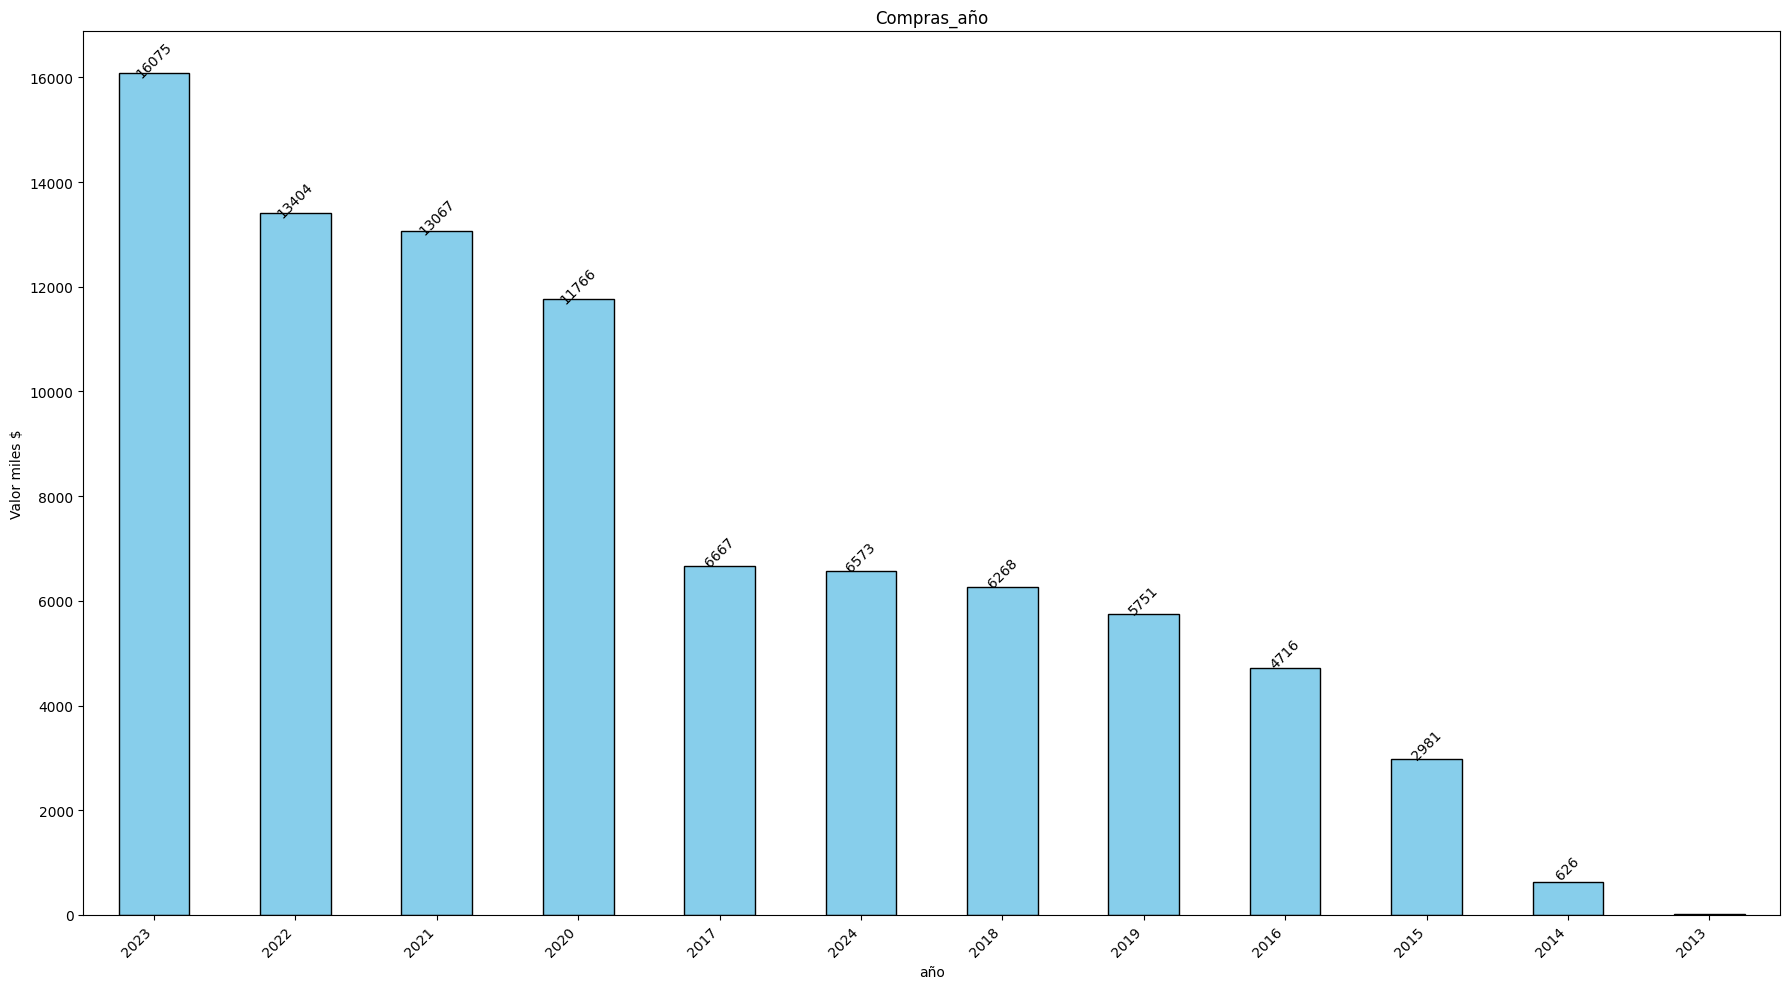

In [20]:
plt.figure(figsize=(18, 10)) 
valor = tiendavirtual_df['año'].value_counts() 
ax = valor.plot(kind='bar', color='skyblue', edgecolor='black')

umbral = 50 
for p in ax.patches: 
    if p.get_height() > umbral: 
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45)
plt.xticks(rotation=45, ha='right')
plt.title('Compras_año')
plt.xlabel('año')
plt.ylabel('Valor miles $')
plt.tight_layout()
plt.show()

La tendencia de las compras a través de la Tienda Virtual del estado Colombiano es al alza entre los años 2020 y 2021, considerando que los datos de 2024 son parciales. Además, se observa la superación de una brecha importante entre 2019 y 2020, periodo en el cual casi se duplicaron las compras por esta plataforma virtual seguramente impulsadas por la pandemia, durante la cual las dependencias responsables de las compras se vieron en la necesidad de realizar la casi totalidad de las compras por medio de ésta estrategia virtual, que antes del COVID-19 se utilizaba parcialmente.

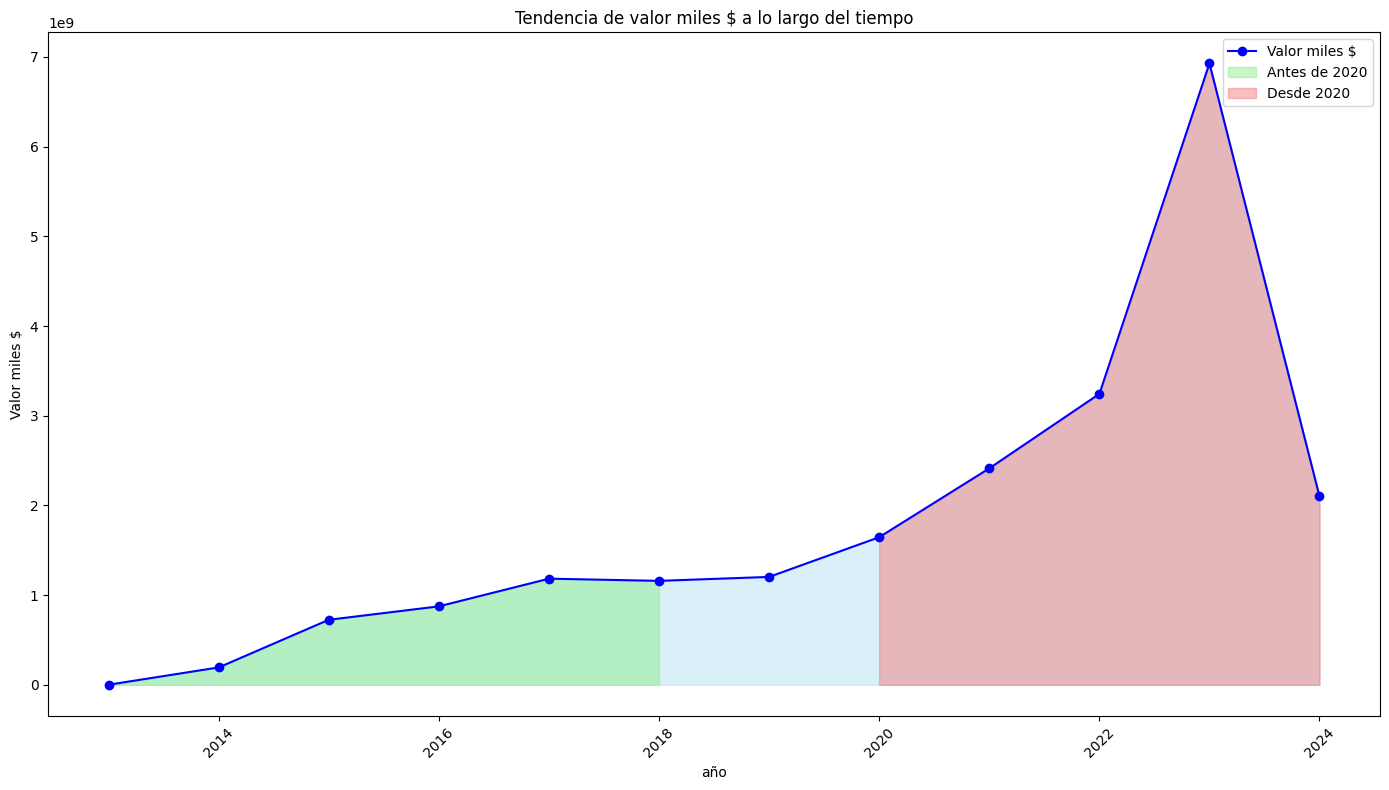

In [22]:
tiendavirtual_df['año'] = pd.to_datetime(tiendavirtual_df['año'], format='%Y')
tendencias_temporales = tiendavirtual_df.groupby('año')['valor miles $'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_temporales['año'], tendencias_temporales['valor miles $'], marker='o', linestyle='-', color='blue', label='Valor miles $')

plt.fill_between(tendencias_temporales['año'], tendencias_temporales['valor miles $'], color='skyblue', alpha=0.3)
plt.fill_between(tendencias_temporales['año'], 0, tendencias_temporales['valor miles $'], where=(tendencias_temporales['año'] < '2019'), color='lightgreen', alpha=0.5, label='Antes de 2020')
plt.fill_between(tendencias_temporales['año'], 0, tendencias_temporales['valor miles $'], where=(tendencias_temporales['año'] >= '2020'), color='lightcoral', alpha=0.5, label='Desde 2020')

plt.title('Tendencia de valor miles $ a lo largo del tiempo')
plt.xlabel('año')
plt.ylabel('Valor miles $')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Confirmando la tendencia identificada en el grafico de barras vertical anterior, se observa como durante el periodo anterior al 2020 disponible, las compras en la plataforma Tienda Virtual del Estado Colombiano, indican un leve incremento anual, mientras que para el año de inicio de la pandemia, se genera un aumento importante, casi triplicando el valor de las compras, dad la coyuntura del 2020, que impulso notablemente su uso.

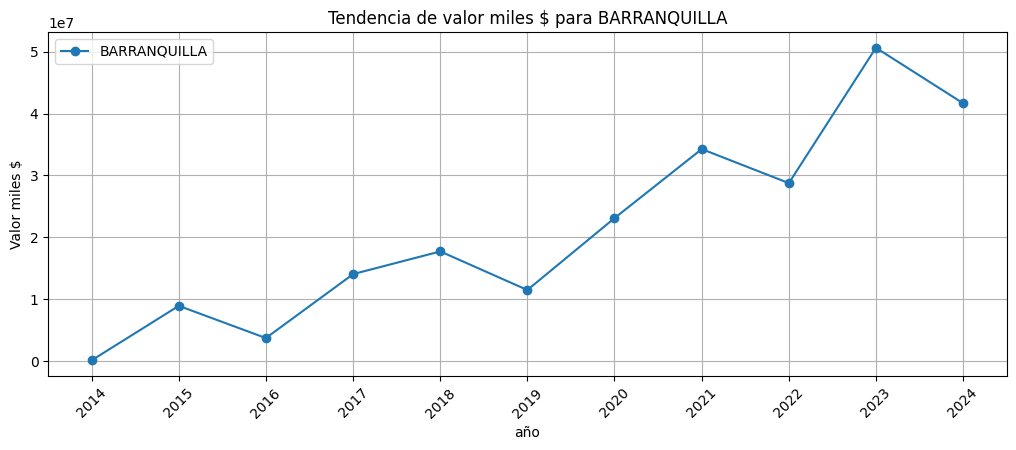

In [23]:
top_6_CIUDADES = tiendavirtual_df['CIUDAD'].value_counts().head(6).index 
plt.figure(figsize=(20, 12)) 
for i, CIUDAD in enumerate(top_6_CIUDADES, 1): 
    CIUDAD_data = tiendavirtual_df[tiendavirtual_df['CIUDAD'] == CIUDAD].copy() 
    CIUDAD_data.loc[:, 'año'] = pd.to_datetime(CIUDAD_data['año'], format='%Y') 
    tendencias_CIUDAD = CIUDAD_data.groupby('año')['valor miles $'].sum().reset_index()
# Subgráfica individual para cada CIUDAD 
plt.subplot(3, 2, i) 
plt.plot(tendencias_CIUDAD['año'], tendencias_CIUDAD['valor miles $'], marker='o', linestyle='-', label=CIUDAD) 
plt.title(f'Tendencia de valor miles $ para {CIUDAD}') 
plt.xlabel('año') 
plt.ylabel('Valor miles $') 
plt.grid(True) 
plt.xticks(rotation=45) 
plt.legend()
plt.tight_layout() 
plt.show()

Para el caso puntual de Barranquilla una de las principales ciudades Colombianas, la tendencia general de aumento significativo a partir de 2020, en esta ciudad si bien se identifica un incremento, no crecio de forma elevada como se observo a nivel general.

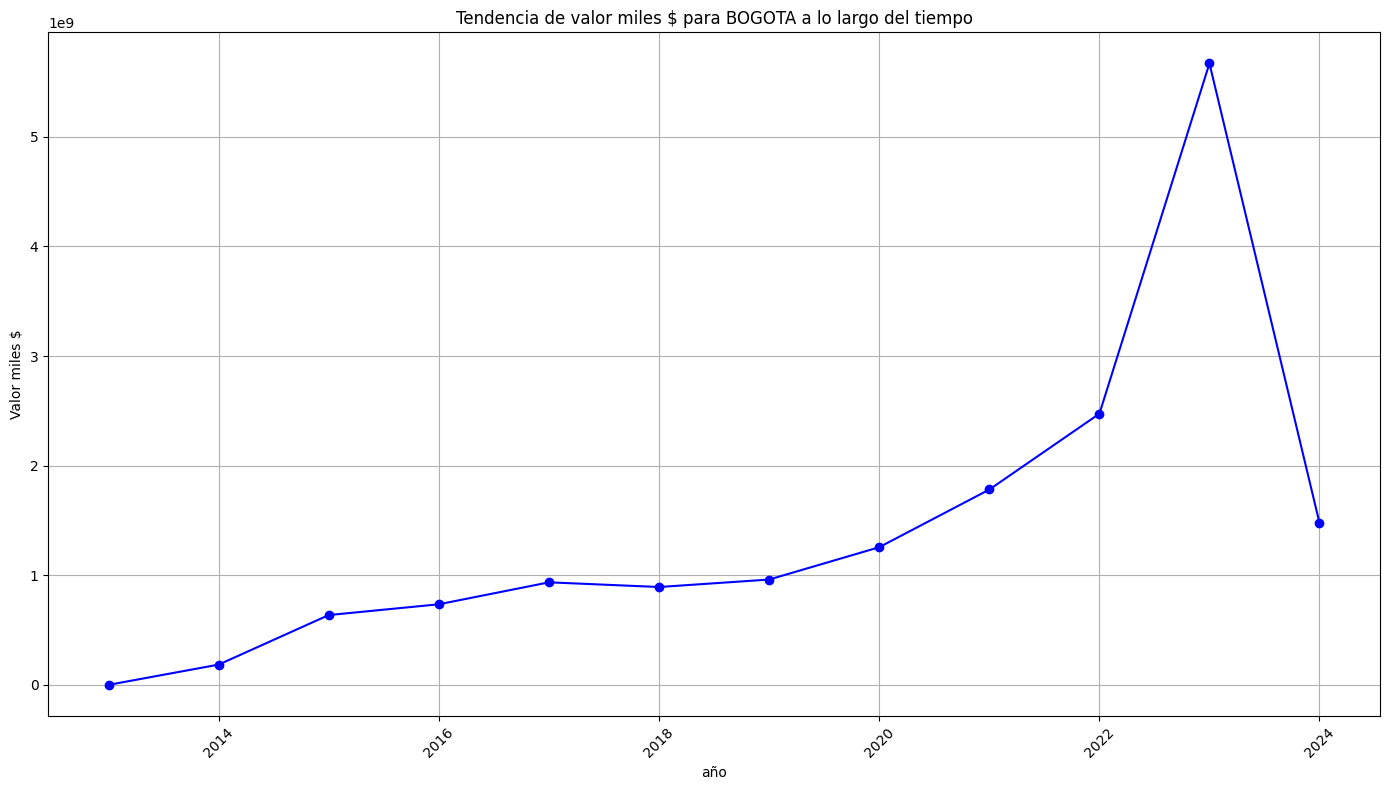

In [24]:
BOGOTA_data = tiendavirtual_df[tiendavirtual_df['CIUDAD'] == 'BOGOTA'].copy()
BOGOTA_data.loc[:, 'año'] = pd.to_datetime(BOGOTA_data['año'], format='%Y')
tendencias_BOGOTA = BOGOTA_data.groupby('año')['valor miles $'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_BOGOTA['año'], tendencias_BOGOTA['valor miles $'], marker='o', linestyle='-', color='b')
plt.title('Tendencia de valor miles $ para BOGOTA a lo largo del tiempo')
plt.xlabel('año')
plt.ylabel('Valor miles $')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el caso de la capital Colombiana, Bogota es foco de atención considerando las compras centralizadas, y se observa un mayor recurso invertido en las compras en la Tienda Virtual Colombiana a partir del 2020, pero inferior al aumento detectado en la tendencia nacional, mientras que esa alza triplicada se evidencia en el año 2023 y considerando que la información de 2024 se presenta con corte a julio.

     año  valor miles $
0   2014        1034681
1   2015       10109179
2   2016       16950883
3   2017       40462296
4   2018       38950076
5   2019       29113886
6   2020       31666781
7   2021       60557560
8   2022       65973125
9   2023      150963005
10  2024       52554668


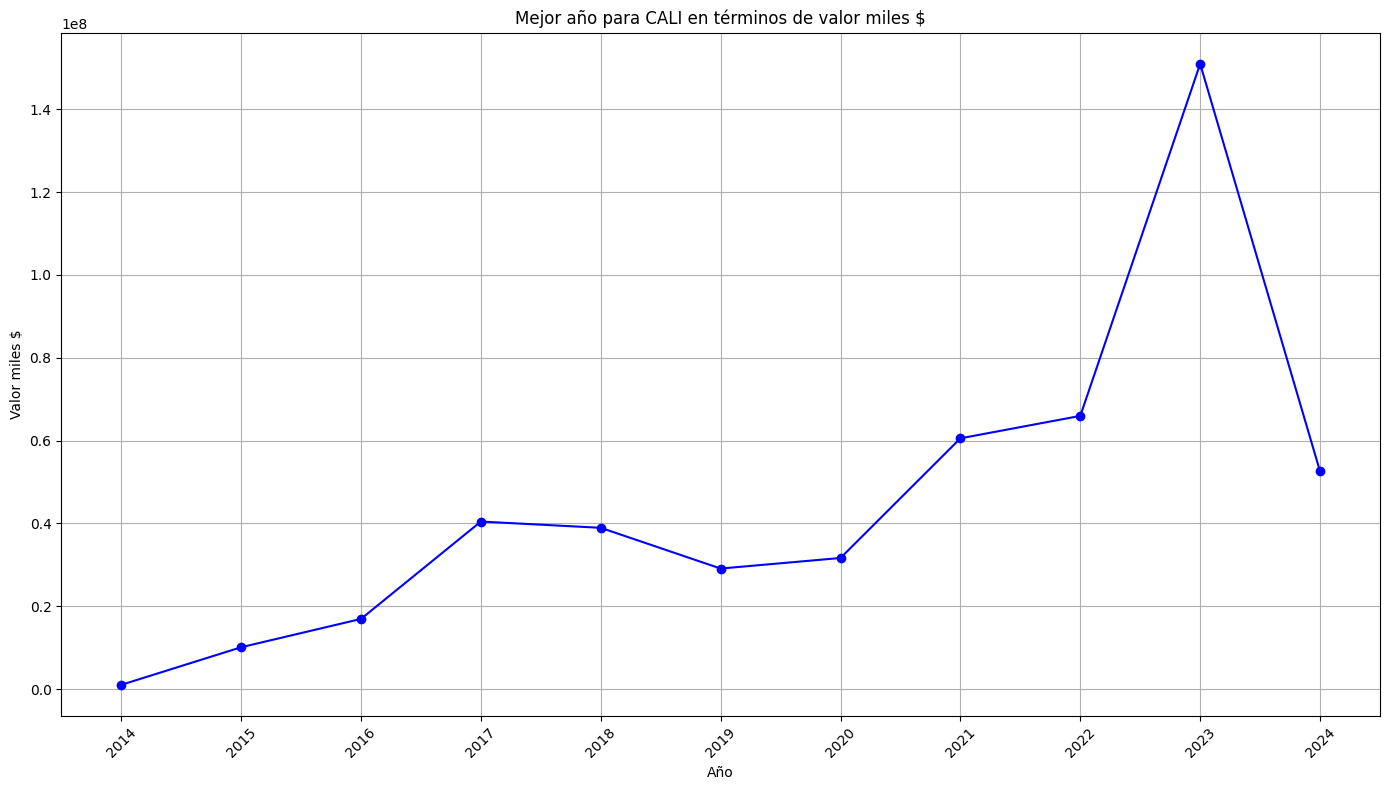

In [25]:
CALI_data = tiendavirtual_df[tiendavirtual_df['CIUDAD'] == 'CALI'].copy()
CALI_data.loc[:, 'año'] = pd.to_datetime(CALI_data['año'], format='%Y')
CALI_data['año'] = CALI_data['año'].dt.year
mejor_CALI_por_año = CALI_data.groupby(['año'])['valor miles $'].sum().reset_index()
mejor_CALI_por_año = mejor_CALI_por_año.loc[mejor_CALI_por_año.groupby('año')['valor miles $'].idxmax()]
print(mejor_CALI_por_año)

plt.figure(figsize=(14, 8))
plt.plot(mejor_CALI_por_año['año'].astype(str), 
         mejor_CALI_por_año['valor miles $'], marker='o', linestyle='-', color='b')
plt.title('Mejor año para CALI en términos de valor miles $')
plt.xlabel('Año')
plt.ylabel('Valor miles $')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Para la capital Valluna, el comportamiento es muy similar al de la capital del país, con un ascenso notable en el año 2023, conservando la misma tendencia.

In [26]:
compras_por_ciudad = tiendavirtual_df.groupby('CIUDAD')['valor miles $'].sum()
ciudades_mayores_compras = compras_por_ciudad.nlargest(3) 
print(ciudades_mayores_compras)

CIUDAD
BOGOTA      17013222314
CALI          498336140
MEDELLIN      488953541
Name: valor miles $, dtype: int64


CIUDAD
BOGOTA      5670123417
CALI         150963005
MEDELLIN     120137451
Name: valor miles $, dtype: int64


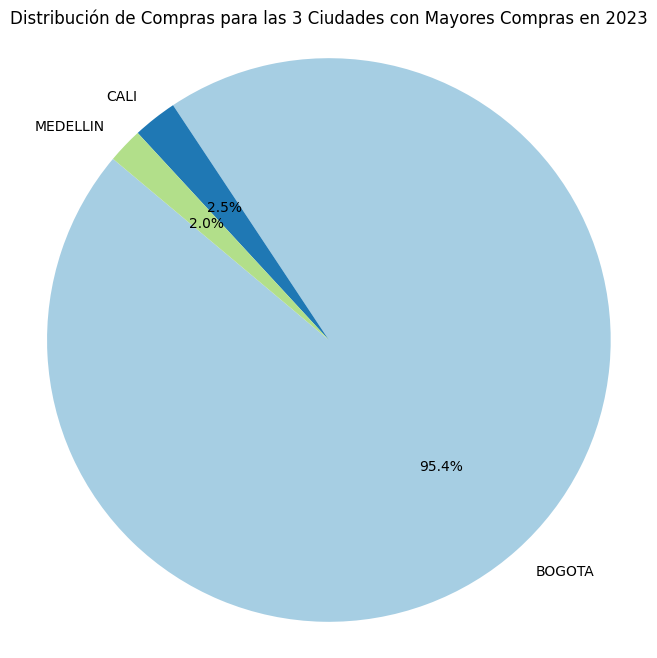

In [27]:
tiendavirtual_df_ano_especifico =tiendavirtual_df[tiendavirtual_df['año'] == '2023']
ventas_por_ciudad = tiendavirtual_df_ano_especifico.groupby('CIUDAD')['valor miles $'].sum()
top_3_ciudades = ventas_por_ciudad.nlargest(3)
print(top_3_ciudades)
plt.figure(figsize=(8, 8))
plt.pie(top_3_ciudades, labels=top_3_ciudades.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_3_ciudades.index))), startangle=140)
plt.title('Distribución de Compras para las 3 Ciudades con Mayores Compras en 2023')
plt.axis('equal')  
plt.show()

Se identificaron las tres (3) ciudades con mayores valores de compras a través de la plataforma Tienda Virtual del Estado Colombiano, evidenciando que la capital del país supera ostensiblemente a otras ciudades importantes supernado por mas del 90% los recursos invertidos en comparas estatales.